# Quantitative methods - HIERARCHICAL - group 5 presentation code

### IMPORT PACKAGES
Import required packages

In [2]:
#data manipulation
import pandas as pd
import numpy as np

#k-means
import numpy as np
import sklearn.cluster as sklc

#hiearchical clustering
import numpy as np
import scipy.cluster.hierarchy as spch

#silluete scores
import sklearn.metrics as sklm

#dendrogram
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
import scipy.cluster.hierarchy as spch

#final plots
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#scaling 
from sklearn import preprocessing

%matplotlib inline

### IMPORT DATA
Import full table and select features

In [3]:
#full dataset

df_path = "/Users/antonios/Documents/Dropbox/Public/QM_Group_Presentation/NHS clusters/1. Data/CSVs/QM_Group_5_STP_Data.csv"
#Manually scaled dataset for testing
#df_path = "/Users/antonios/Documents/Dropbox/Public/QM_Group_Presentation/NHS clusters/1. Data/Standardisation/QM_Group_5_STP_Data_Stand_AF.csv"

df_NHS_full = pd.read_csv(df_path)
df_NHS_full = df_NHS_full.set_index("Area_name")
df_NHS_full.head()

,Area_code,Patient count,CV_AF,CV_CHD,CV_CVD,CV_HF,CV_LVSD,CV_HYP,CV_PAD,CV_STIA,...,HD_CKD,HD_DM,HD_PC,Neu_DEM,Neu_DEP,Neu_EP,Neu_LD,Neu_MH,MS_OST,MS_RA
Area_name,,,,,,,,,,,,,,,,,,,,,
WEST YORKSHIRE STP,E54000005,"2,710,486",0.017530,0.033269,0.011364,0.007996,NaN,0.135138,0.006777,0.018056,...,0.038359,0.070256,0.003941,0.007557,0.104067,0.008438,0.005647,0.009517,0.005943,0.007371
"HUMBER, COAST AND VALE STP",E54000006,"1,428,962",0.022570,0.040518,0.012420,0.008486,NaN,0.155717,0.007130,0.020714,...,0.044293,0.070110,0.003274,0.008516,0.094997,0.009300,0.004699,0.008069,0.004915,0.008539
GREATER MANCHESTER STP,E54000007,"3,044,238",0.016898,0.032779,0.011504,0.008936,NaN,0.135521,0.007432,0.017775,...,0.038841,0.071991,0.004023,0.007317,0.113701,0.008975,0.005146,0.010423,0.005948,0.006895
CHESHIRE AND MERSEYSIDE STP,E54000008,"2,620,326",0.023235,0.037414,0.013089,0.010488,NaN,0.153691,0.008175,0.020313,...,0.048123,0.068995,0.004547,0.008390,0.118263,0.009542,0.005292,0.010865,0.007024,0.008190
SOUTH YORKSHIRE AND BASSETLAW STP,E54000009,"1,574,811",0.020883,0.037363,0.011053,0.010077,NaN,0.144359,0.007403,0.020341,...,0.046828,0.071637,0.004116,0.008624,0.108962,0.009298,0.006038,0.008666,0.004553,0.007600


#### SAMPLE DATA
Sub-select relevant columns

In [4]:
#ADD COLUMN NAMES OF WANTED VARIABLES HERE
wanted_variables = ["CV_HYP","LS_OB","HD_CAN","Neu_DEP","Neu_MH","Resp_AST"]

df_NHS_sample = df_NHS_full[wanted_variables]
df_NHS_transform = df_NHS_full[wanted_variables]

df_NHS_sample.head()


        #df1['GG'][key]=df[key].loc[df['2010'].iloc[:,0]=='GG']


#Transform to multiply all % by 100
for column in wanted_variables:
    df_NHS_transform.loc[:,column] = (df_NHS_sample.loc[:,column]*100).copy()
    
df_NHS_transform.columns = ["Hypertension","Obesity","Cancer","Depression","Mental health","Asthma"]
df_NHS_transform.index.name = "Area name"


df_NHS_transform.describe()

/Users/antonios/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,14.245036,9.794524,2.852103,10.007908,0.912965,6.040094
std,1.650992,1.722609,0.521830,1.444589,0.123327,0.668985
min,10.560932,5.820715,1.525505,6.384569,0.722217,4.389151
25%,13.162746,8.540744,2.569907,9.333540,0.817965,5.807491
50%,14.423130,9.717108,2.951305,10.027425,0.867090,6.265985
75%,15.520476,11.150265,3.200263,10.915953,0.996901,6.502184
max,16.600187,13.272109,3.840752,12.820154,1.267849,6.878169


In [5]:
#Scaling code from: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

# Get column names first
names = df_NHS_transform.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df_NHS_scaled = scaler.fit_transform(df_NHS_transform)
df_NHS_scaled = pd.DataFrame(df_NHS_scaled, columns=names)

df_NHS_scaled.set_index(df_NHS_transform.index, inplace = True)
df_NHS_scaled.describe()
df_NHS_scaled.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

df_NHS_scaled_log = df_NHS_scaled


#### VISUALISE DATA

In [6]:
#Function to take in any dataframe with only numerical columns
file_count = 0

def f_plot(dataframe):
    sns_plot = sns.pairplot(dataframe, height=3, aspect=1.5)
    
    global file_count
    file_count = file_count +1
    
    fig = sns_plot.fig
    fig.savefig(f"Hierarchical_plot_{file_count}_output.png")

In [7]:
#f_plot(df_NHS_transform)

### HIERARCHICAL CLUSTERING

In [8]:
###SET UP DATA 

#Create dataframe with only the columns on which we are doing our cluster analysis
df_analyse = df_NHS_scaled
df_master = df_NHS_scaled
df_analyse.head()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
Area name,,,,,,
WEST YORKSHIRE STP,-0.448042,0.801245,-0.508483,0.279284,0.317505,0.486241
"HUMBER, COAST AND VALE STP",0.812860,0.865889,0.633591,-0.355897,-0.869572,0.518328
GREATER MANCHESTER STP,-0.424545,0.359973,-0.798182,0.953832,1.060551,0.552939
CHESHIRE AND MERSEYSIDE STP,0.688701,0.794421,0.371492,1.273283,1.423437,0.389044
SOUTH YORKSHIRE AND BASSETLAW STP,0.116937,1.460910,-0.417069,0.621999,-0.380461,0.319346


In [9]:
#Cluster criteria

u_method = "single"
u_metric = "euclidean"
u_criterion = "distance"

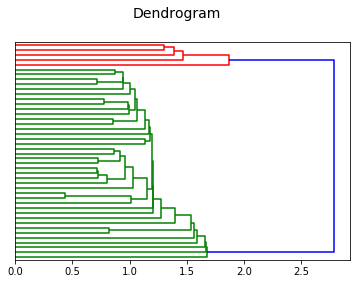

<Figure size 504x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
#DENDROGRAM

# The following lines create and display a dendrogram, saving it as a png:

Z = spch.linkage(df_analyse, method=u_method, metric=u_metric)
spch.dendrogram(Z,orientation='right')
plt.suptitle("Dendrogram", fontsize = 14, va = "center")
plt.yticks([])
plt.figure(figsize = (7,7))
plt.show()
plt.savefig('my_dendrogram.png')

# Dendrogram (ugly axes - we'll talk about how to deal with this next week)
print()

#Z = spch.linkage(df_analyse, method=u_method, metric=u_metric)
#plt.figure(30,figsize = (10,20))
#spch.dendrogram(Z,orientation='right',color_threshold=4)

#plt.suptitle("Dendrogram", fontsize = 14, va = "center")
#plt.show()
#plt.savefig('q8_dendrogram.png')



In [12]:
# The procedure is almost identical to the previous question, but for a different clustering method:

distance_thresholds = np.linspace(0,20,20)

cluster_ids_series_h = []
cluster_shs_series_h = []
cluster_k_series_h   = []

for r in distance_thresholds:

    # Perform clustering:
    
    new_cluster_allocations = spch.fclusterdata(df_analyse, r, criterion=u_criterion, method=u_method)
    
    # Store the number of distinct clusters
    
    num_clusters = 1 + new_cluster_allocations.max() - new_cluster_allocations.min()
    
    # Update lists:
    
    cluster_ids_series_h.append(new_cluster_allocations)
    cluster_k_series_h.append(num_clusters)
    
    try:
        cluster_shs_series_h.append(sklm.silhouette_score(df_analyse,new_cluster_allocations))
    except:
        cluster_shs_series_h.append(0)

# Basically the same as Q7:
        
report_dict_h = {'r':distance_thresholds,'k':cluster_k_series_h,'Silhouette Score':cluster_shs_series_h}
report_df_h   = pd.DataFrame(report_dict_h)
report_df_h   = report_df_h.dropna(how='any')

optimal_row_by_silhouette_score_h = report_df_h['Silhouette Score'].argmax()
optimal_r_by_silhouette_score_h   = report_df_h.loc[optimal_row_by_silhouette_score_h,'r']
optimal_k_by_silhouette_score_h   = report_df_h.loc[optimal_row_by_silhouette_score_h,'k']
optimal_silhouette_score_h        = report_df_h.loc[optimal_row_by_silhouette_score_h,'Silhouette Score']

print('The optimal radius, as determined by silhouette analysis, is ' + str(optimal_r_by_silhouette_score_h) + ".")
print('The silhouette score for r = ' + str(optimal_r_by_silhouette_score_h) + " is " + str(optimal_silhouette_score_h) + ".")
print('This corresponds to ' + str(optimal_k_by_silhouette_score_h) + ' clusters.')

The optimal radius, as determined by silhouette analysis, is 2.1052631578947367.
The silhouette score for r = 2.1052631578947367 is 0.5399797033855835.
This corresponds to 2 clusters.


/Users/antonios/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


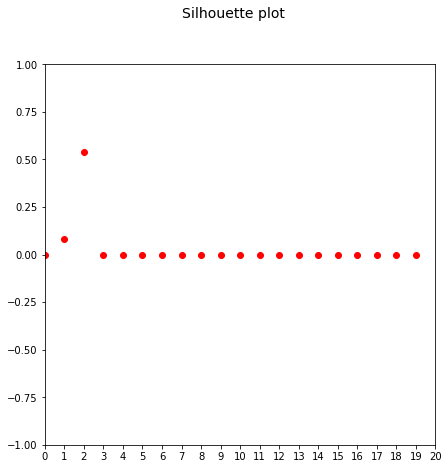

In [11]:
fignum = 21
plt.figure(fignum,figsize = (7,7))
plt.plot(report_df_h.index,report_df_h['Silhouette Score'],'ro')

plt.gca().set_xlim([0,int(distance_thresholds.max())])
plt.gca().set_xticks(range(int(distance_thresholds.max())+1))
plt.gca().set_ylim([-1,1])

plt.suptitle('Silhouette plot', fontsize=14, va = "center")

plt.savefig('silhouette_plot' + str(fignum) +'.png')
plt.show()

In [12]:
# We will add the optimal cluster ids to the main dataframe:

optimal_cluster_ids_h = cluster_ids_series_h[optimal_row_by_silhouette_score_h]
df_master['optimal_hagglom_cluster_ids'] = optimal_cluster_ids_h

df_master.head()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma,optimal_hagglom_cluster_ids
Area name,,,,,,,
WEST YORKSHIRE STP,-0.448042,0.801245,-0.508483,0.279284,0.317505,0.486241,1
"HUMBER, COAST AND VALE STP",0.812860,0.865889,0.633591,-0.355897,-0.869572,0.518328,1
GREATER MANCHESTER STP,-0.424545,0.359973,-0.798182,0.953832,1.060551,0.552939,1
CHESHIRE AND MERSEYSIDE STP,0.688701,0.794421,0.371492,1.273283,1.423437,0.389044,1
SOUTH YORKSHIRE AND BASSETLAW STP,0.116937,1.460910,-0.417069,0.621999,-0.380461,0.319346,1


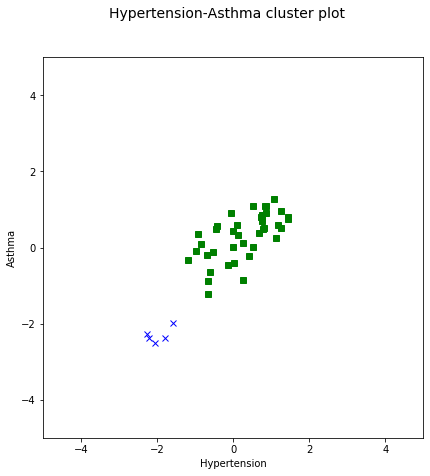

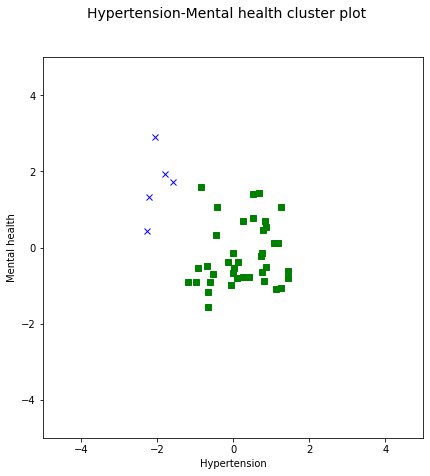

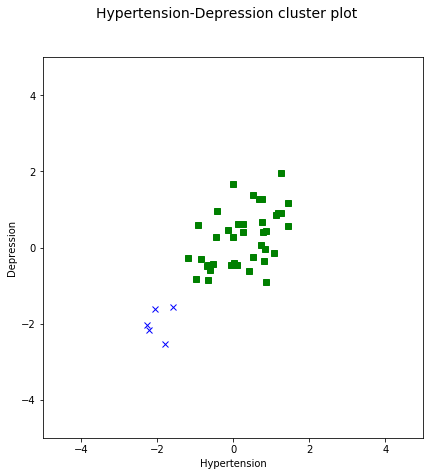

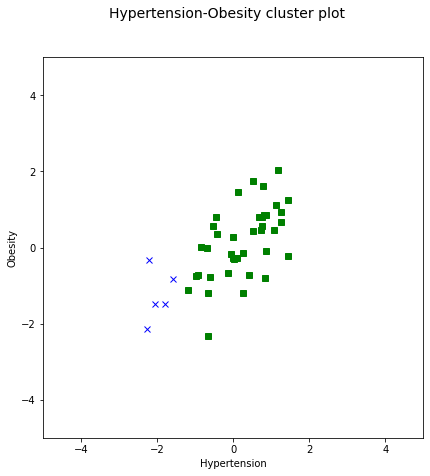

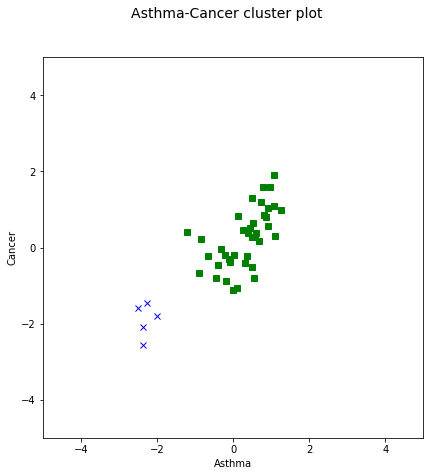

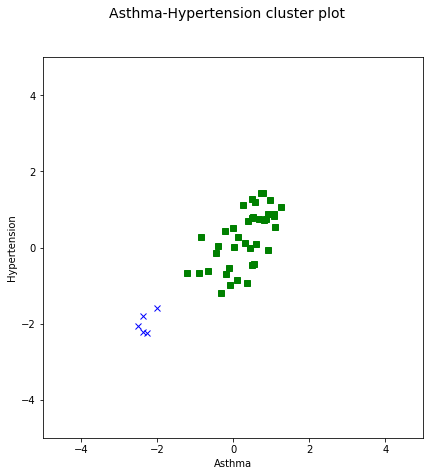

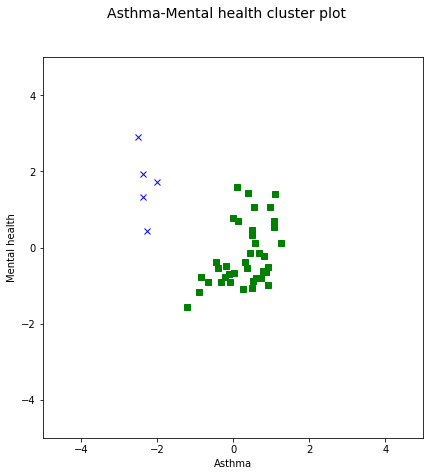

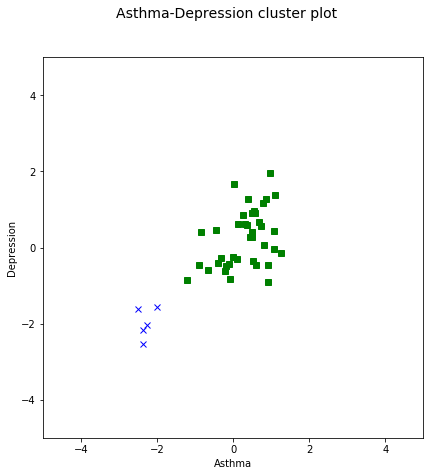

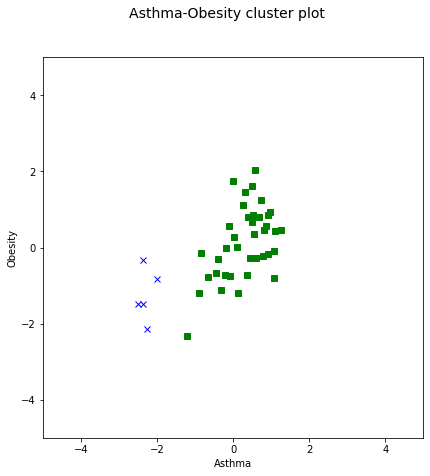

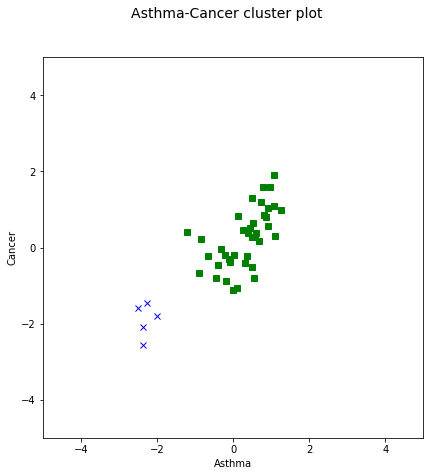

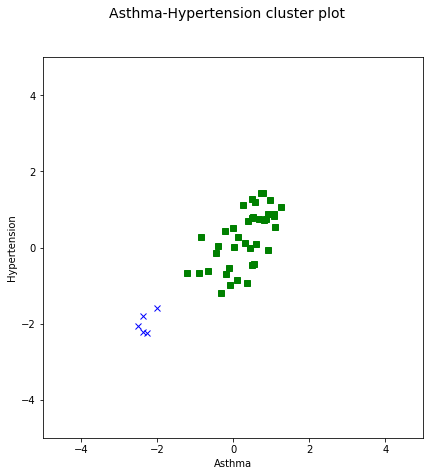

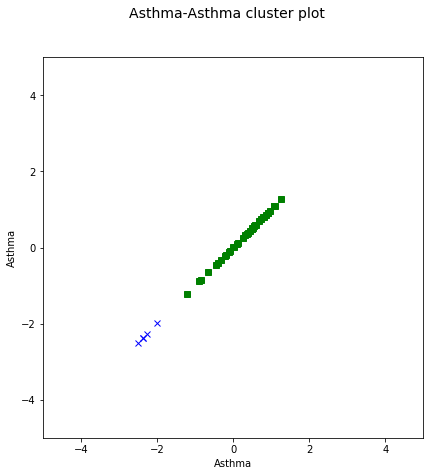

In [13]:
# ... let's visualise these clusters in 2D plots, taking two variables at a time.

colours = ['r',"g",'b','g','m','k','c','y'] * 12
icons   = ['o',"s",'x','s','.','v','^','<','>','*','+','D','d'] * 7

# k variable defined in previous cell
k = 20

def plot_clusters_for_two_variables(data,data_clusters,var1,var2,fignum):

    plt.figure(fignum,figsize = (7,7))

    for i in range(k):
        
        plt.figure(fignum)
        data_this_cluster = data[data_clusters==i]
        
        plt.plot(data_this_cluster[var1],data_this_cluster[var2],colours[i] + icons[i])

        plt.gca().set_aspect('equal')
        plt.gca().set_xlim([-5,5])
        plt.gca().set_ylim([-5,5])
    
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.suptitle(f"{var1}-{var2} cluster plot", size = 14)
    plt.savefig('clusters_' + str(fignum) +'.png')

    plt.show()
    
cluster_ids = df_master['optimal_hagglom_cluster_ids']

#call function above to plot 

#COLUMN NAMES: CV_HYP	Resp_AST	LS_OB	HD_CAN	Neu_DEP	Neu_MH





plot_clusters_for_two_variables(df_master,cluster_ids,'Hypertension','Asthma',10)
plot_clusters_for_two_variables(df_master,cluster_ids,'Hypertension','Mental health',11)

plot_clusters_for_two_variables(df_master,cluster_ids,'Hypertension','Depression',12)
plot_clusters_for_two_variables(df_master,cluster_ids,'Hypertension','Obesity',13)

plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Cancer',14)
plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Hypertension',15)
############################

plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Mental health',16)

plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Depression',17)
plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Obesity',18)

plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Cancer',19)
plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Hypertension',20)
plot_clusters_for_two_variables(df_master,cluster_ids,'Asthma','Asthma',21)

In [14]:
# Create an empty list for the separate dataframes:

separate_cluster_dataframes = []

# Create a list of the cluster id numbers:

clusters = range(df_master['optimal_hagglom_cluster_ids'].max() + 1)

# For each cluster, take a reduced version of the main dataframe, filtered to contain only that cluster. 

for i in clusters:
    separate_cluster_dataframes.append(df_master[df_master['optimal_hagglom_cluster_ids'] == i])

# Create summary stats dataframes for each cluster:
    
separate_cluster_summary_stats = []

for i in clusters:
    separate_cluster_summary_stats.append(separate_cluster_dataframes[i].describe())

### SUMMARY STATISTICS BY CLUSTER

In [22]:
#separate_cluster_summary_stats[1]
#separate_cluster_summary_stats[0]
#df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == 0]

cluster_0_areas = df_master[df_master['optimal_hagglom_cluster_ids'] == 1].index
cluster_0_data = df_NHS_transform.loc[cluster_0_areas,:]

cluster_0_data.describe()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,14.659963,10.067193,2.977819,10.370856,0.886981,6.235037
std,1.227229,1.592909,0.399839,1.066218,0.099210,0.401956
min,12.306925,5.820715,2.273070,8.725139,0.722217,5.237761
25%,13.532951,8.970802,2.676534,9.407543,0.815397,5.969850
50%,14.682241,10.246479,2.996502,10.406747,0.852009,6.329892
75%,15.579766,11.166555,3.268748,11.109240,0.960651,6.547431
max,16.600187,13.272109,3.840752,12.820154,1.106285,6.878169


In [23]:
#separate_cluster_summary_stats[1]
#separate_cluster_summary_stats[0]
#df_k_means_master[df_k_means_master['optimal_kmeans_cluster_ids'] == 0]

cluster_0_areas = df_master[df_master['optimal_hagglom_cluster_ids'] == 2].index
cluster_0_data = df_NHS_transform.loc[cluster_0_areas,:]

cluster_0_data.describe()

,Hypertension,Obesity,Cancer,Depression,Mental health,Asthma
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,11.008604,7.667700,1.871514,7.176908,1.115640,4.519537
std,0.471690,1.189672,0.229079,0.575434,0.109855,0.124560
min,10.560932,6.165639,1.525505,6.384569,0.966410,4.389151
25%,10.616230,7.256099,1.774493,6.912117,1.073748,4.472412
50%,10.891937,7.256698,1.925375,7.118969,1.122379,4.474128
75%,11.307605,8.402993,2.033334,7.706745,1.147812,4.541747
max,11.666318,9.257070,2.098862,7.762141,1.267849,4.720247


Index(['NORTH WEST LONDON STP', 'NORTH CENTRAL LONDON STP',
       'NORTH EAST LONDON STP', 'SOUTH EAST LONDON STP',
       'SOUTH WEST LONDON STP'],
      dtype='object', name='Area name')